In [1]:
import numpy as np
from os import environ
environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras


from keras.layers import Dense
from matplotlib import pyplot as plt




# https://towardsdatascience.com/machine-learning-on-macos-with-an-amd-gpu-and-plaidml-55a46fe94bc0

Using plaidml.keras.backend backend.


In [2]:
# Params
num_samples = 100000 
vect_len = 20
max_int = 10
min_int = 1

# Generate dataset
X = np.random.randint(min_int, max_int, (num_samples, vect_len))
Y = np.sum(X, axis=1)

# Get 80% of data for training
split_idx = int(0.8 * len(Y))
train_X = X[:split_idx, :]; test_X = X[split_idx:, :]
train_Y = Y[:split_idx]; test_Y = Y[split_idx:]


In [3]:
# Make model
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, activation='relu', input_shape=(vect_len,)))
model.add(keras.layers.Dense(1))
model.compile('adam', 'mse', metrics=['accuracy'])

INFO:plaidml:Opening device "opencl_intel_iris(tm)_graphics_6100.0"


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), \
                    epochs=10, batch_size=128)

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 5s 68us/step - loss: -4163235.4365 - acc: 0.0000e+00 - val_loss: -21568393.4784 - val_acc: 0.0000e+00
Epoch 2/10
80000/80000 [==============================] - 5s 64us/step - loss: -133925588.1600 - acc: 0.0000e+00 - val_loss: -337518959.5136 - val_acc: 0.0000e+00
Epoch 3/10
80000/80000 [==============================] - 5s 66us/step - loss: -820425152.2048 - acc: 0.0000e+00 - val_loss: -1490737342.2592 - val_acc: 0.0000e+00
Epoch 4/10
80000/80000 [==============================] - 5s 64us/step - loss: -2633445061.2224 - acc: 0.0000e+00 - val_loss: -4053029790.5152 - val_acc: 0.0000e+00
Epoch 5/10
80000/80000 [==============================] - 5s 68us/step - loss: -6132822425.1904 - acc: 0.0000e+00 - val_loss: -8570433131.3152 - val_acc: 0.0000e+00
Epoch 6/10
80000/80000 [==============================] - 5s 65us/step - loss: -11852564319.4368 - acc: 0.0000e+00 - val_loss: -15565

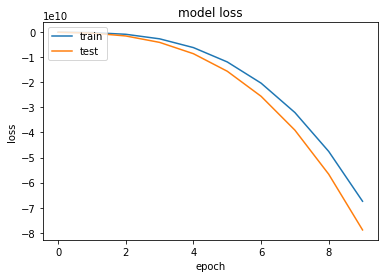

In [6]:
# summarize history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
